In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
sns.color_palette("rocket_r")
df=pd.read_csv('Data/2_state_data.csv', index_col=0)
sns.set(style='whitegrid')

In [6]:
df.head()

,State,Quantity,Acquisition Value,numStations,exp per station,deaths,pctBodyCam,pctfleeing,pctMHSymptoms,pctDeathsBlack,...,pctDeathsAsian,pctDeathsOther,pctPopWhite,pctPopBlack,pctPopHisp,pctPopAsian,pctPopOther,pctPopNative,Population,deaths_per_100k
0,AK,17782,1644529.46,209,7868.562010,39.0,10.26,48.72,15.38,7.692308,...,5.128205,10.256410,60.0,3.0,7.0,6.0,7.0,17.0,732517.0,5.324109
1,AL,13116,40407156.02,1646,24548.697461,104.0,13.46,36.54,25.00,28.846154,...,0.000000,9.615385,66.0,26.0,4.0,1.0,2.0,1.0,4845319.8,2.146401
2,AR,9595,7867417.67,868,9063.845242,81.0,4.94,32.10,16.05,30.864198,...,1.234568,13.580247,72.0,15.0,8.0,2.0,3.0,2.0,2973843.5,2.723748
3,AZ,8143,6990431.91,642,10888.523224,253.0,10.28,35.18,18.58,6.719368,...,0.000000,13.043478,54.0,4.0,32.0,3.0,2.0,5.0,6804946.7,3.717884
4,CA,38522,46904224.48,1843,25449.931894,793.0,14.12,36.32,22.70,15.006305,...,3.656999,12.610340,37.0,5.0,39.0,15.0,3.0,2.0,38618190.0,2.053436


In [7]:
df.describe()

,Quantity,Acquisition Value,numStations,exp per station,deaths,pctBodyCam,pctfleeing,pctMHSymptoms,pctDeathsBlack,pctDeathsWhite,...,pctDeathsAsian,pctDeathsOther,pctPopWhite,pctPopBlack,pctPopHisp,pctPopAsian,pctPopOther,pctPopNative,Population,deaths_per_100k
count,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,4.800000e+01,48.000000
mean,8013.645833,1.082952e+07,681.020833,21050.012239,111.291667,12.398750,36.091458,22.936667,21.891108,53.865043,...,1.163916,9.300137,69.50000,10.479167,12.041667,3.708333,2.729167,2.416667,6.585888e+06,1.973332
std,10611.132892,1.368868e+07,810.466125,24622.118496,132.945511,8.255954,9.703170,8.929637,16.167187,15.524003,...,1.581286,4.961705,14.62001,9.531559,10.692925,2.880295,1.162162,3.009441,7.216988e+06,1.078389
min,42.000000,1.592113e+05,7.000000,3298.973844,9.000000,0.000000,0.000000,0.000000,0.000000,22.857143,...,0.000000,0.000000,37.00000,0.000000,1.000000,1.000000,1.000000,0.000000,5.777863e+05,0.500999
25%,871.500000,1.865980e+06,112.250000,10802.419993,38.000000,7.472500,32.700000,17.395000,8.947399,42.744305,...,0.000000,5.229420,59.75000,3.000000,4.750000,2.000000,2.000000,1.000000,2.036756e+06,1.314424
50%,2866.500000,5.924950e+06,371.500000,15386.180219,87.500000,10.295000,35.900000,22.050000,20.333159,54.083571,...,0.724676,9.353147,71.50000,7.500000,9.500000,3.000000,2.000000,1.000000,4.738234e+06,1.773267
75%,8507.500000,1.322761e+07,874.750000,22796.572599,116.000000,14.375000,38.905000,27.490000,33.152324,63.151721,...,1.595079,12.788558,80.25000,14.250000,13.250000,5.000000,3.000000,2.000000,7.441570e+06,2.307226
max,42341.000000,5.819489e+07,3501.000000,150075.763125,793.000000,33.330000,56.250000,46.150000,58.227848,92.307692,...,5.921053,23.076923,93.00000,38.000000,49.000000,15.000000,7.000000,17.000000,3.861819e+07,5.324109


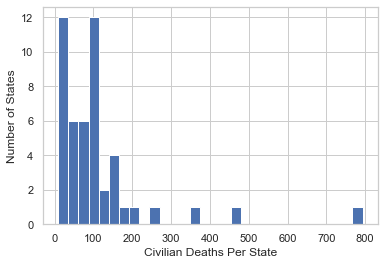

In [39]:
df.deaths.hist(bins=30)
plt.xlabel('Civilian Deaths Per State')
plt.ylabel('Number of States')
plt.savefig('deathdist.png',bbox_inches='tight')
plt.show()

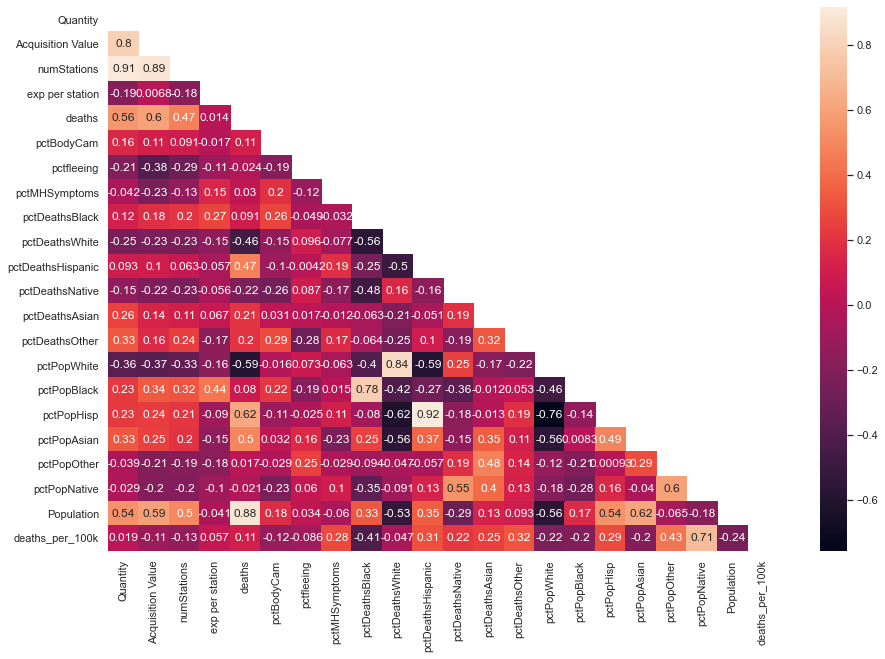

In [9]:
plt.figure(figsize = (15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, mask=mask)
plt.show()

## Deaths By Population

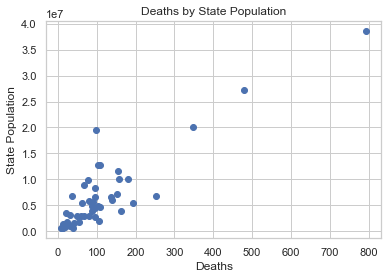

In [10]:
plt.scatter(df.deaths, df.Population)
plt.xlabel('Deaths')
plt.ylabel('State Population')
plt.title('Deaths by State Population')
plt.savefig('deathsbypopulation.png',bbox_inches='tight')

The first thing that jumps out to me here is the fact that the deaths and the state population seem to increase at the same rate. But I'm very curious about those three outliers with over 300 deaths per 1000 residents and what the plot would look like without them. 

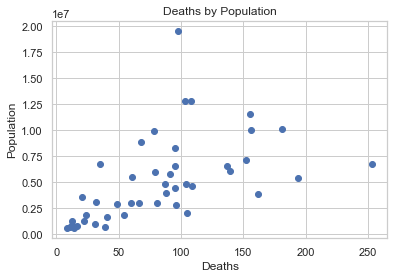

In [11]:
plt.scatter(df[df.deaths<300].deaths, df[df.deaths<300].Population)
plt.xlabel('Deaths')
plt.ylabel('Population')
plt.title('Deaths by Population')
plt.savefig('deathbypopulation2.png',bbox_inches='tight')

In [12]:
under300 = df[df.deaths<300]
under300[under300.Population > 15000000]

,State,Quantity,Acquisition Value,numStations,exp per station,deaths,pctBodyCam,pctfleeing,pctMHSymptoms,pctDeathsBlack,...,pctDeathsAsian,pctDeathsOther,pctPopWhite,pctPopBlack,pctPopHisp,pctPopAsian,pctPopOther,pctPopNative,Population,deaths_per_100k
32,NY,5460,10543512.41,511,20633.096693,98.0,13.33,38.1,17.14,44.897959,...,1.020408,10.204082,55.0,14.0,19.0,9.0,3.0,1.0,19560912.5,0.500999


In [13]:
over300 = df[df.deaths>300]
over300

,State,Quantity,Acquisition Value,numStations,exp per station,deaths,pctBodyCam,pctfleeing,pctMHSymptoms,pctDeathsBlack,...,pctDeathsAsian,pctDeathsOther,pctPopWhite,pctPopBlack,pctPopHisp,pctPopAsian,pctPopOther,pctPopNative,Population,deaths_per_100k
4,CA,38522,46904224.48,1843,25449.931894,793.0,14.12,36.32,22.70,15.006305,...,3.656999,12.610340,37.0,5.0,39.0,15.0,3.0,2.0,38618190.0,2.053436
8,FL,6500,19894778.19,942,21119.722070,349.0,15.38,38.46,30.77,31.518625,...,0.286533,7.449857,53.0,15.0,26.0,3.0,2.0,2.0,20109631.4,1.735487
40,TX,33938,44714654.43,3071,14560.291250,479.0,12.64,34.48,19.54,19.832985,...,1.043841,12.734864,41.0,12.0,40.0,5.0,2.0,2.0,27172096.6,1.762838


Text(0.5, 1.0, 'Deaths by State Population')

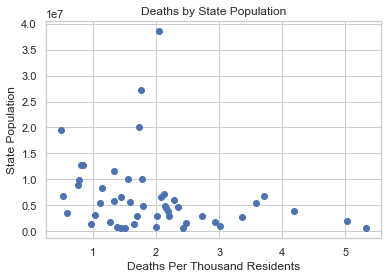

In [14]:
plt.scatter(df.deaths_per_100k, df.Population)
plt.xlabel('Deaths Per Thousand Residents')
plt.ylabel('State Population')
plt.title('Deaths by State Population')

This is a really strange plot and I'm not entirely sure what to make of it. Because it seemed like deaths generally seemed to increase with the population I assumes the majority of these data points to cluster around the 1, but there are a few points that stand out with very high population and low deaths, and very low population but high rates of deaths. 

In [15]:
popUnder10m = df[df.Population < 10000000]
highest_death_rates = popUnder10m[popUnder10m.deaths_per_100k > 2]

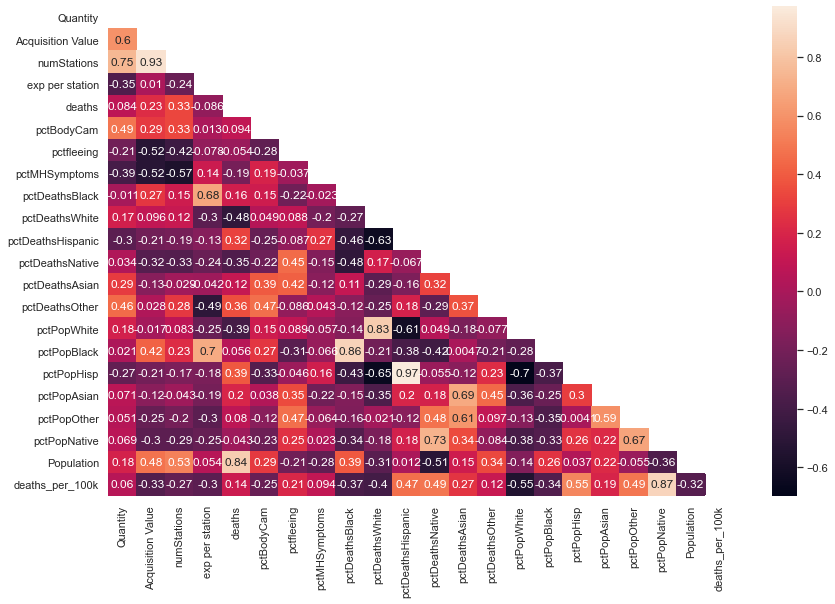

In [16]:
plt.figure(figsize = (14,9))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(highest_death_rates.corr(), mask=mask, annot=True)
plt.show()

## DOD Purchases

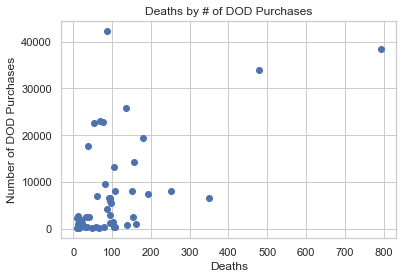

In [17]:
plt.scatter(df.deaths, df.Quantity)
plt.xlabel('Deaths')
plt.ylabel('Number of DOD Purchases')
plt.title('Deaths by # of DOD Purchases')
plt.savefig('deathsbypurchases.png',bbox_inches='tight')

Text(0.5, 1.0, '# of DOD Purchases by State Population')

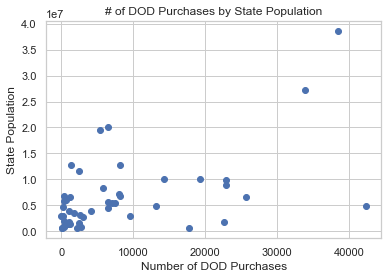

In [18]:
plt.scatter(df.Quantity,df.Population)
plt.ylabel('State Population')
plt.xlabel('Number of DOD Purchases')
plt.title('# of DOD Purchases by State Population')


## Death Statistics by Race

Text(0.5, 1.0, '# of DOD Purchases by White Population')

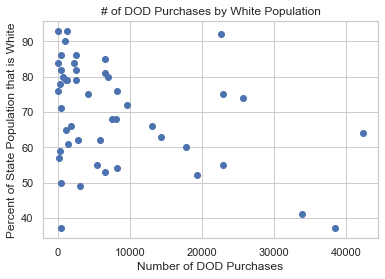

In [19]:
plt.scatter(df.Quantity,df.pctPopWhite)
plt.ylabel('Percent of State Population that is White')
plt.xlabel('Number of DOD Purchases')
plt.title('# of DOD Purchases by White Population')

Text(0.5, 1.0, 'White Population Percentage by Total State Population')

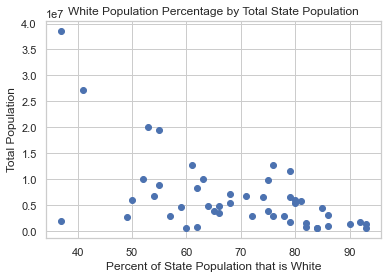

In [20]:
plt.scatter(df.pctPopWhite,df.Population)
plt.xlabel('Percent of State Population that is White')
plt.ylabel('Total Population')
plt.title('White Population Percentage by Total State Population')

In [21]:
#I'm just really curious to see which states are majority minority states, and after running this it makes a lot
#of sense that they are all land that used to be Mexico prior to the 1800s. Curious as to what caused states like
#AZ and UT not to have such high minority populations.
majMinStates = df[df['pctPopWhite'] < 50]
majMinStates

,State,Quantity,Acquisition Value,numStations,exp per station,deaths,pctBodyCam,pctfleeing,pctMHSymptoms,pctDeathsBlack,...,pctDeathsAsian,pctDeathsOther,pctPopWhite,pctPopBlack,pctPopHisp,pctPopAsian,pctPopOther,pctPopNative,Population,deaths_per_100k
4,CA,38522,46904224.48,1843,25449.931894,793.0,14.12,36.32,22.70,15.006305,...,3.656999,12.610340,37.0,5.0,39.0,15.0,3.0,2.0,38618190.0,2.053436
30,NM,452,1995990.47,104,19192.216058,105.0,7.69,15.38,46.15,0.952381,...,0.000000,13.333333,37.0,2.0,49.0,2.0,2.0,9.0,2087642.7,5.029596
31,NV,2988,6577546.30,339,19402.791445,96.0,2.94,38.24,20.59,15.625000,...,2.083333,12.500000,49.0,9.0,29.0,8.0,4.0,2.0,2861463.3,3.354927
40,TX,33938,44714654.43,3071,14560.291250,479.0,12.64,34.48,19.54,19.832985,...,1.043841,12.734864,41.0,12.0,40.0,5.0,2.0,2.0,27172096.6,1.762838


Text(0.5, 1.0, 'Black Percentage of Police Deaths by Deaths Per 100k Population')

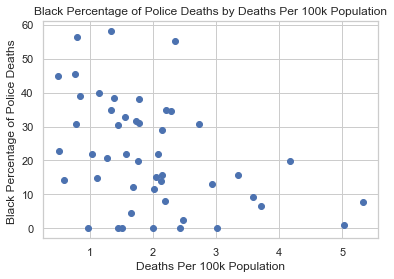

In [22]:
plt.scatter(df.deaths_per_100k, df.pctDeathsBlack)
plt.xlabel('Deaths Per 100k Population')
plt.ylabel('Black Percentage of Police Deaths ')
plt.title('Black Percentage of Police Deaths by Deaths Per 100k Population')

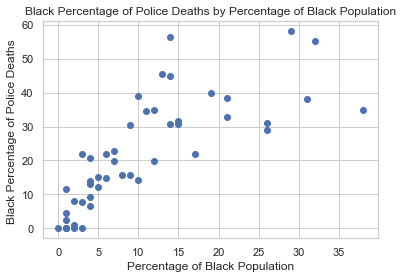

In [23]:
plt.scatter(df.pctPopBlack, df.pctDeathsBlack)
plt.xlabel('Percentage of Black Population')
plt.ylabel('Black Percentage of Police Deaths ')
plt.title('Black Percentage of Police Deaths by Percentage of Black Population')
plt.savefig('blackdeath.png',bbox_inches='tight')

So at first glance this distribution appears to have a curve to it. All the points indicate that the deaths at the hands of the police are disproportionately higher than the percentage of the population that is black. BUT there seems to be a sort of sharp increase in 10-15 percent of state population being Black. 

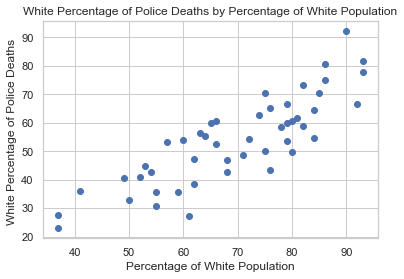

In [24]:
plt.scatter(df.pctPopWhite, df.pctDeathsWhite)
plt.xlabel('Percentage of White Population')
plt.ylabel('White Percentage of Police Deaths ')
plt.title('White Percentage of Police Deaths by Percentage of White Population')
plt.savefig('whitedeath.png',bbox_inches='tight')

In a surprise to absolutely no one, the percentage of deaths at the hands of police that are white are almost never higher than the percentage of the total population that is white. There is one (1) outlier.

In [25]:
df[df.pctDeathsWhite > 90]

,State,Quantity,Acquisition Value,numStations,exp per station,deaths,pctBodyCam,pctfleeing,pctMHSymptoms,pctDeathsBlack,...,pctDeathsAsian,pctDeathsOther,pctPopWhite,pctPopBlack,pctPopHisp,pctPopAsian,pctPopOther,pctPopNative,Population,deaths_per_100k
28,NH,934,706981.23,103,6863.895437,13.0,9.09,45.45,18.18,0.0,...,0.0,7.692308,90.0,1.0,4.0,3.0,2.0,0.0,1336177.9,0.972924


And that state is New Hampshire.

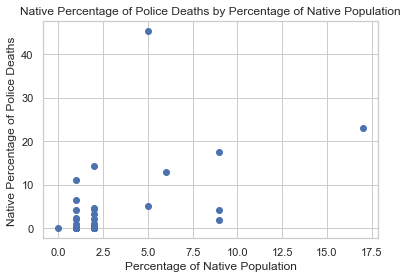

In [26]:
plt.scatter(df.pctPopNative, df.pctDeathsNative)
plt.xlabel('Percentage of Native Population')
plt.ylabel('Native Percentage of Police Deaths ')
plt.title('Native Percentage of Police Deaths by Percentage of Native Population')
plt.savefig('nativedeath.png',bbox_inches='tight')

Text(0.5, 1.0, 'Hispanic Percentage of Police Deaths by Percentage of Hispanic Population')

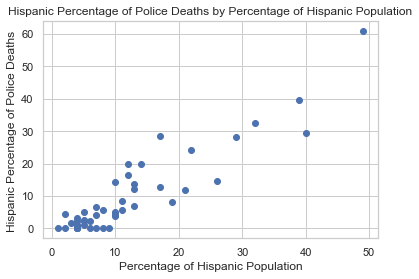

In [27]:
plt.scatter(df.pctPopHisp, df.pctDeathsHispanic)
plt.xlabel('Percentage of Hispanic Population')
plt.ylabel('Hispanic Percentage of Police Deaths ')
plt.title('Hispanic Percentage of Police Deaths by Percentage of Hispanic Population')

Text(0.5, 1.0, 'Asian Percentage of Police Deaths by Percentage of Asian Population')

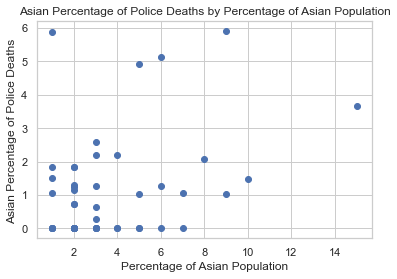

In [28]:
plt.scatter(df.pctPopAsian, df.pctDeathsAsian)
plt.xlabel('Percentage of Asian Population')
plt.ylabel('Asian Percentage of Police Deaths ')
plt.title('Asian Percentage of Police Deaths by Percentage of Asian Population')

Text(0.5, 1.0, 'Other Percentage of Police Deaths by Percentage of Other Population')

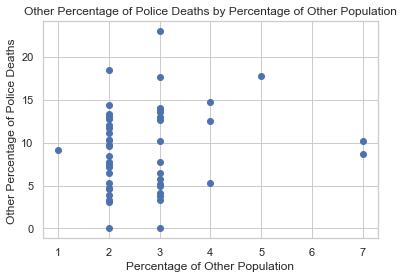

In [29]:
plt.scatter(df.pctPopOther, df.pctDeathsOther)
plt.xlabel('Percentage of Other Population')
plt.ylabel('Other Percentage of Police Deaths ')
plt.title('Other Percentage of Police Deaths by Percentage of Other Population')

In [30]:
print("Ratio of % of Other* Total Police Deaths/% of Other* Population: " + 
      str(df.pctDeathsOther.mean()/df.pctPopOther.mean()))
print("Ratio of % of Black Total Police Deaths/% of Black Population: " + 
      str(df.pctDeathsBlack.mean()/df.pctPopBlack.mean()))
print("Ratio of % of Natives Total Police Deaths/% of Native Population: " + 
      str(df.pctDeathsNative.mean()/df.pctPopNative.mean()))
print("Ratio of % of Hispanic Total Police Deaths/% of Hispanic Population: " + 
      str(df.pctDeathsHispanic.mean()/df.pctPopHisp.mean()))
print("Ratio of % of White Total Police Deaths/% of White Population: " + 
      str(df.pctDeathsWhite.mean()/df.pctPopWhite.mean()))
print("Ratio of % of Asian Total Police Deaths/% of Asian Population: " + 
      str(df.pctDeathsAsian.mean()/df.pctPopAsian.mean()))


print("*Note: The other category contains unknowns and makes up such a small percentage of the total population, but has a very high ratio.")

Ratio of % of Other* Total Police Deaths/% of Other* Population: 3.4076839598049666
Ratio of % of Black Total Police Deaths/% of Black Population: 2.0890122656328027
Ratio of % of Natives Total Police Deaths/% of Native Population: 1.4595062132656558
Ratio of % of Hispanic Total Police Deaths/% of Hispanic Population: 0.8089956114509183
Ratio of % of White Total Police Deaths/% of White Population: 0.7750365943943524
Ratio of % of Asian Total Police Deaths/% of Asian Population: 0.3138649465721807
*Note: The other category contains unknowns and makes up such a small percentage of the total population, but has a very high ratio.


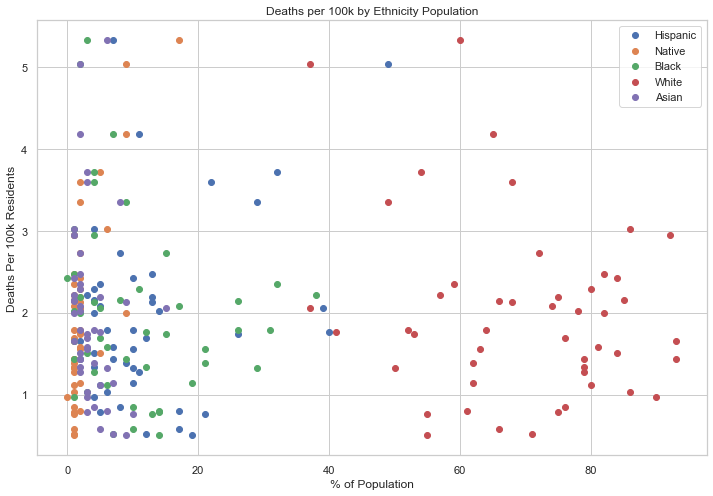

In [31]:
plt.figure(figsize = (12,8))
plt.scatter(df.pctPopHisp, df.deaths_per_100k, label="Hispanic")
plt.xlabel('% of Population')
plt.ylabel('Deaths Per 100k Residents')
plt.scatter(df.pctPopNative, df.deaths_per_100k, label="Native")
plt.scatter(df.pctPopBlack, df.deaths_per_100k, label="Black")
plt.scatter(df.pctPopWhite, df.deaths_per_100k, label="White")
plt.scatter(df.pctPopAsian, df.deaths_per_100k, label="Asian")
plt.title('Deaths per 100k by Ethnicity Population')
plt.legend()


## Encounter Details

Text(0.5, 0, 'Percentage of Victims Killed with Body Camera Recording')

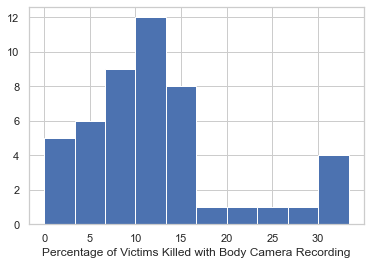

In [32]:
df.pctBodyCam.hist()
plt.xlabel('Percentage of Victims Killed with Body Camera Recording')

Text(0.5, 0, 'Percentage of Victims Fleeing')

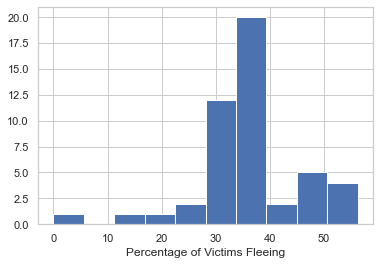

In [33]:
df.pctfleeing.hist()
plt.xlabel('Percentage of Victims Fleeing')

Text(0.5, 0, 'Percentage of Victims Displaying Mental Health Symptoms')

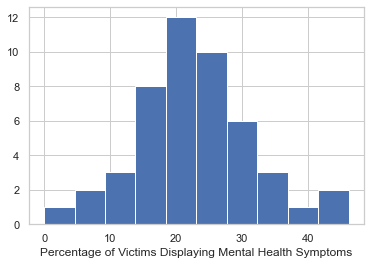

In [34]:
df.pctMHSymptoms.hist()
plt.xlabel('Percentage of Victims Displaying Mental Health Symptoms')

Text(0.5, 1.0, '')

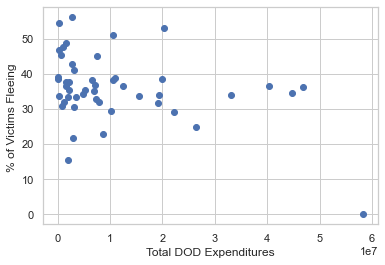

In [35]:
plt.scatter(df['Acquisition Value'], df.pctfleeing)
plt.xlabel('Total DOD Expenditures')
plt.ylabel('% of Victims Fleeing ')
plt.title('')
#White the heat map showed a small correlation it looks like there is one large outlier skewing the calculation.

Text(0.5, 1.0, '')

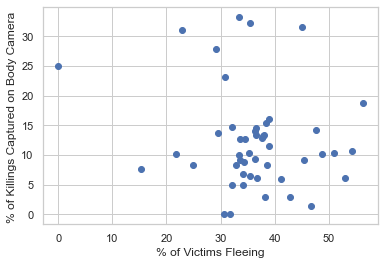

In [36]:
plt.scatter(df.pctfleeing,df.pctBodyCam)
plt.xlabel('% of Victims Fleeing')
plt.ylabel('% of Killings Captured on Body Camera ')
plt.title('')

Text(0.5, 1.0, '')

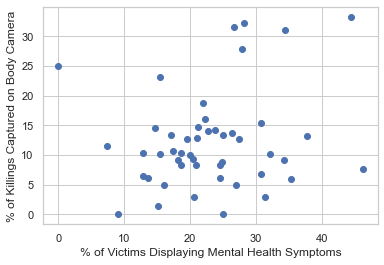

In [37]:
plt.scatter(df.pctMHSymptoms,df.pctBodyCam)
plt.xlabel('% of Victims Displaying Mental Health Symptoms')
plt.ylabel('% of Killings Captured on Body Camera')
plt.title('')

Text(0.5, 1.0, '')

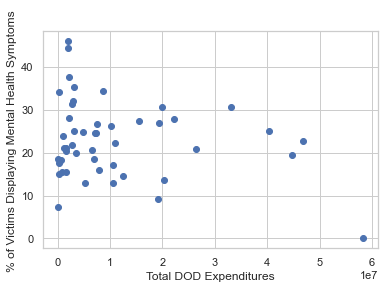

In [38]:
plt.scatter(df['Acquisition Value'], df.pctMHSymptoms)
plt.xlabel('Total DOD Expenditures')
plt.ylabel('% of Victims Displaying Mental Health Symptoms ')
plt.title('')


This pattern seems to be the most interesting with regards to DOD expenditures. It appears that the highest percentage of victims displaying mental health problems are in states that have not spent very much in DOD expenses. 